In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('1.csv')
df = df.drop(['sell-or-buy','count','last_page','results.listing_datetime','results.listings','page'],axis = 1)

In [3]:
df.head(10)

,total,unit_price,quantity
0,3226,53089,2524
1,3226,53001,2483
2,3226,52984,2562
3,3226,52598,2463
4,3226,52750,2465
5,3226,51946,2511
6,3226,50000,2498
7,3226,52999,2426
8,3226,54062,2296
9,3226,53500,2413


In [4]:
df.describe()

,total,unit_price,quantity
count,1000.0,1000.000000,1000.000000
mean,3226.0,56344.106000,2346.029000
std,0.0,2980.085216,570.051548
min,3226.0,47356.000000,1562.000000
25%,3226.0,54607.250000,1983.750000
50%,3226.0,57205.000000,2204.500000
75%,3226.0,58586.000000,2484.000000
max,3226.0,60218.000000,4721.000000


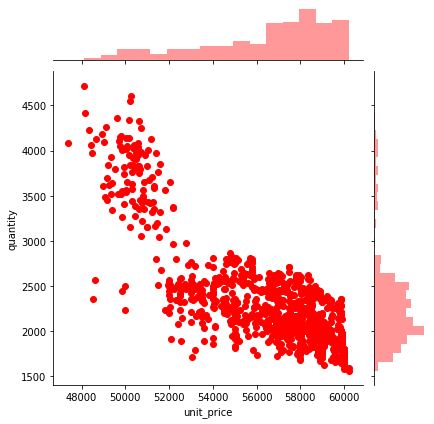

In [5]:
sns.jointplot(x='unit_price',y='quantity',data=df, color='red')

In [6]:
new_df=df.mask((df - df.mean()).abs() > 2 * df.std())
new_df.describe()

,total,unit_price,quantity
count,1000.0,941.000000,922.000000
mean,3226.0,56768.658874,2213.324295
std,0.0,2520.063719,346.612786
min,3226.0,50406.000000,1562.000000
25%,3226.0,55049.000000,1967.000000
50%,3226.0,57484.000000,2168.500000
75%,3226.0,58699.000000,2432.500000
max,3226.0,60218.000000,3484.000000


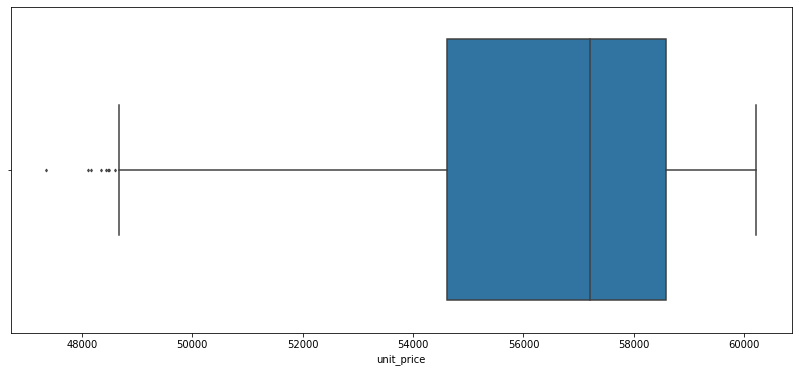

In [7]:
plt.figure(figsize=(14,6))
box_plot = sns.boxplot(x = 'unit_price', data = df, flierprops = dict(markerfacecolor = '0.50', markersize = 2))
medians = df.groupby(['unit_price']).median()


In [8]:
new_df=df.mask((df - df.mean()).abs() > 2 * df.std())
df2 = new_df.dropna()
df2.describe()


,total,unit_price,quantity
count,910.0,910.000000,910.000000
mean,3226.0,56968.090110,2203.325275
std,0.0,2313.565553,333.174516
min,3226.0,50430.000000,1562.000000
25%,3226.0,55437.250000,1964.000000
50%,3226.0,57499.000000,2164.500000
75%,3226.0,58784.500000,2421.250000
max,3226.0,60218.000000,3465.000000


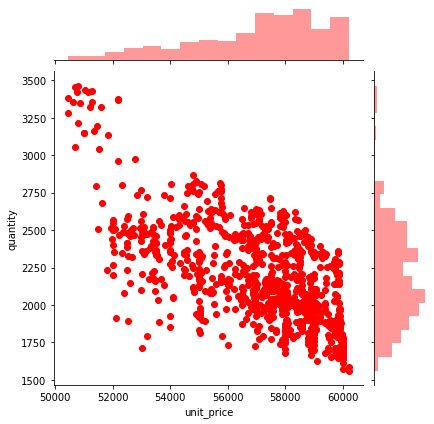

In [9]:
sns.jointplot(x='unit_price',y='quantity',data=df2, color='red')

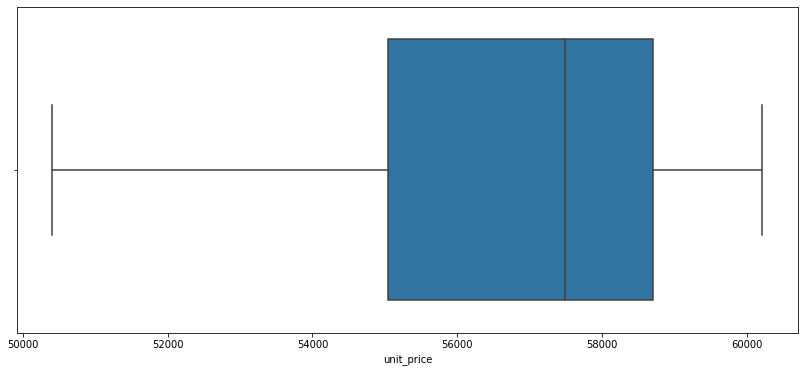

In [10]:
plt.figure(figsize=(14,6))
box_plot = sns.boxplot(x = 'unit_price', data = new_df, flierprops = dict(markerfacecolor = '0.50', markersize = 2))

In [11]:
#Implementing linear regression model

In [12]:
X = df2['quantity'].values.reshape(-1,1)
y = df2['unit_price'].values.reshape(-1,1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[66879.63077378]
[[-4.50297804]]


In [16]:
y_pred = regressor.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,55400.0,57382.850090
1,57993.0,55374.521885
2,59692.0,56572.314043
3,56045.0,57265.772661
4,57298.0,57202.730968
...,...,...
177,58223.0,57864.668740
178,55009.0,57063.138649
179,57410.0,55829.322667
180,56924.0,56356.171097


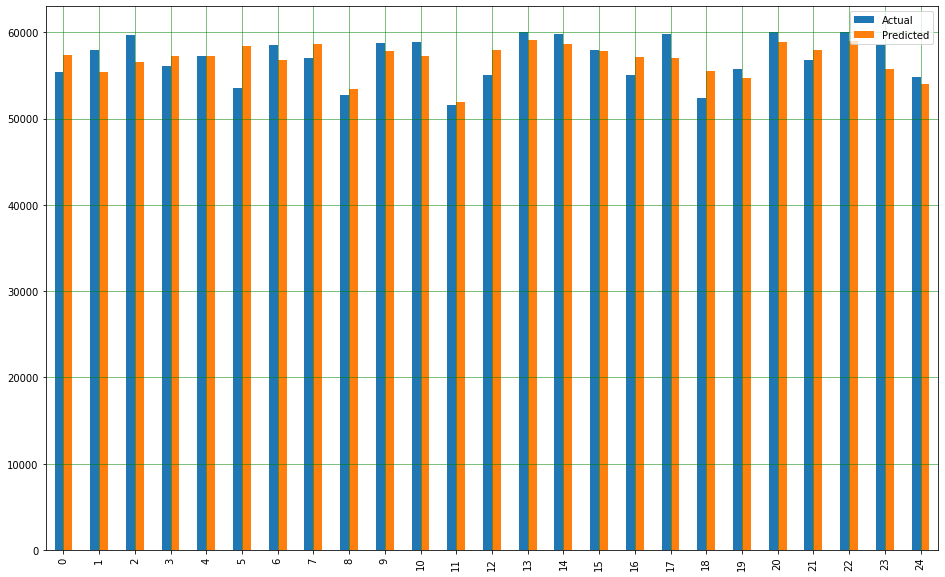

In [18]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

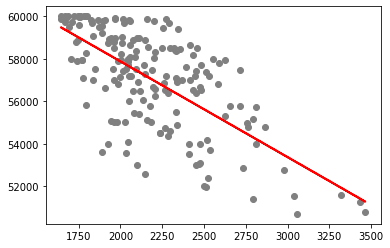

In [19]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [20]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

1748.1440232150433